In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [19]:
FILENAME = 'datasets/combined_and_cleaned.csv'

df = pd.read_csv(FILENAME)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   urls              2528 non-null   object
 1   titles            2528 non-null   object
 2   authors           2528 non-null   object
 3   published_dates   2528 non-null   object
 4   articles_content  2528 non-null   object
 5   news_org          2528 non-null   object
dtypes: object(6)
memory usage: 118.6+ KB


,urls,titles,authors,published_dates,articles_content,news_org
0,https://www.rappler.com/newsbreak/explainers/w...,Here’s why COVID-19 vaccines haven’t arrived i...,SOFIA TOMACRUZ,2021-02-18 09:22:00,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Rappler
1,https://www.rappler.com/newsbreak/iq/timeline-...,TIMELINE: The Philippines’ 2021 COVID-19 vacci...,SOFIA TOMACRUZ,2021-02-04 19:43:00,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...",Rappler
2,https://www.rappler.com/nation/philippines-rec...,"After initial delay, Philippines to receive As...",SOFIA TOMACRUZ,2021-03-03 14:41:00,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...",Rappler
3,https://www.rappler.com/nation/philippines-gra...,Philippines grants emergency approval for Sino...,SOFIA TOMACRUZ,2021-02-22 12:19:00,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",Rappler
4,https://www.rappler.com/nation/philippines-rec...,Philippines receives first COVID-19 vaccine de...,SOFIA TOMACRUZ,2021-02-28 16:16:00,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",Rappler
...,...,...,...,...,...,...
2523,https://mb.com.ph/2020/03/07/virus-folding-puz...,Virus-folding puzzle game might help find vacc...,manilabulletin_admin,"March 7, 2020, 12:00 AM",By Rizal ObanilThis development has the making...,manilabulletin
2524,https://mb.com.ph/2020/02/25/needed-vaccine-in...,Needed: vaccine & info on how Covid-1 spreads,manilabulletin_admin,"February 25, 2020, 12:00 AM","The search for a vaccine for the coronavirus, ...",manilabulletin
2525,https://mb.com.ph/2020/02/22/phap-to-immediate...,PHAP to immediately bring new COVID-19 vaccine...,manilabulletin_admin,"February 22, 2020, 12:00 AM",By Bernie Cahiles-MagkilatThe Pharmaceutical A...,manilabulletin
2526,https://mb.com.ph/2020/02/14/as-scientists-rac...,As scientists race to produce Covid-19 vaccine...,manilabulletin_admin,"February 14, 2020, 12:00 AM",By Analou De VeraAn official of the World Heal...,manilabulletin


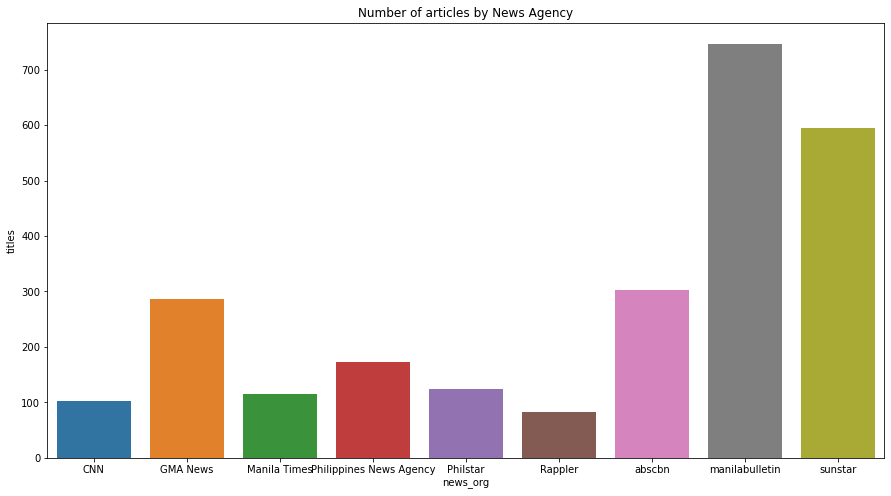

In [20]:
# Distribution of the Different Articles
distribution = df.groupby(['news_org'])['titles'].count().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x="news_org", y="titles", data=distribution)
plt.title('Number of articles by News Agency')
plt.show()

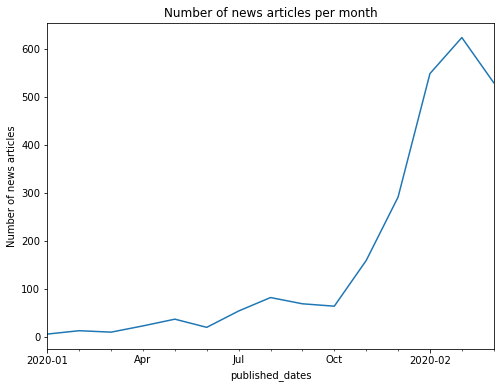

In [21]:
#Get the monthly frequency of the news
df['published_dates'] = pd.to_datetime(df['published_dates'])
date = df.set_index('published_dates')
date = date['titles'].resample('M').count() #M for month
#line chart of monthly articles

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
date.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
ax.set_xticklabels([x.strftime('%Y-%m') for x in date.index])

plt.ylabel('Number of news articles')
plt.title('Number of news articles per month')
plt.show()

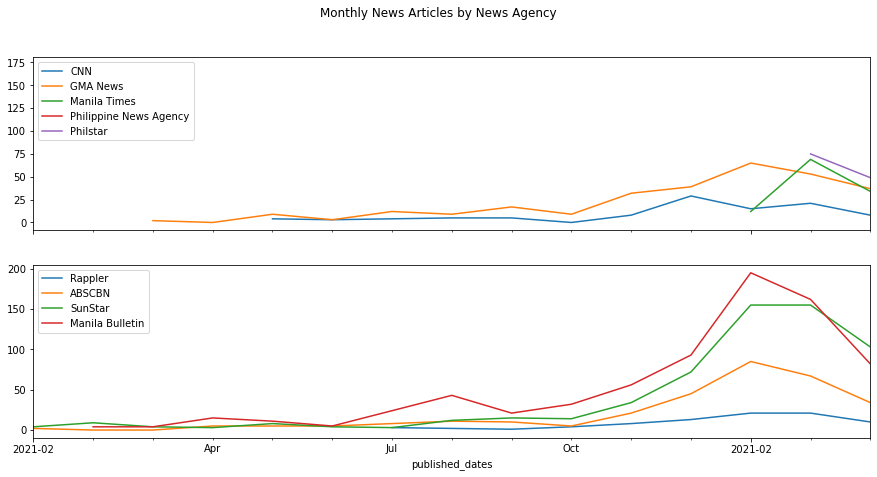

In [22]:
#line chart of monthly streams
news_org = df.set_index('published_dates')

#default is line so you can omit kind= parameter
data1 = news_org[news_org['news_org']=='CNN']['titles'].resample('M').count()
data2 = news_org[news_org['news_org']=='GMA News']['titles'].resample('M').count()
data3 = news_org[news_org['news_org']=='Manila Times']['titles'].resample('M').count()
data4 = news_org[news_org['news_org']=='Philippines News Agency']['titles'].resample('M').count()
data5 = news_org[news_org['news_org']=='Philstar']['titles'].resample('M').count()
data6 = news_org[news_org['news_org']=='Rappler']['titles'].resample('M').count()
data7 = news_org[news_org['news_org']=='abscbn']['titles'].resample('M').count()
data8 = news_org[news_org['news_org']=='sunstar']['titles'].resample('M').count()
data9 = news_org[news_org['news_org']=='manilabulletin']['titles'].resample('M').count()

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,7))
fig.suptitle('Monthly News Articles by News Agency')

data1.plot(ax=ax1, label='CNN')
data2.plot(ax=ax1, label='GMA News')
data3.plot(ax=ax1, label='Manila Times')
data4.plot(ax=ax1, label='Philippine News Agency')
data5.plot(ax=ax1, label='Philstar')
data6.plot(ax=ax2, label='Rappler')
data7.plot(ax=ax2, label='ABSCBN')
data8.plot(ax=ax2, label='SunStar')
data9.plot(ax=ax2, label='Manila Bulletin')
ax1.set_xticklabels([x.strftime('%Y-%m') for x in news_org.index])
ax2.set_xticklabels([x.strftime('%Y-%m') for x in news_org.index])
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")


In [23]:
FILENAME = 'datasets/model.csv'
df = pd.read_csv(FILENAME)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   urls                           2528 non-null   object 
 1   titles                         2528 non-null   object 
 2   authors                        2528 non-null   object 
 3   published_dates                2528 non-null   object 
 4   articles_content               2528 non-null   object 
 5   news_org                       2528 non-null   object 
 6   articles_summary               2528 non-null   object 
 7   dominant_topic                 2528 non-null   float64
 8   topic_percentage_contribution  2528 non-null   float64
 9   keywords                       2528 non-null   object 
 10  text                           2528 non-null   object 
 11  polarity                       2528 non-null   float64
 12  negativity                     2528 non-null   f

,urls,titles,authors,published_dates,articles_content,news_org,articles_summary,dominant_topic,topic_percentage_contribution,keywords,text,polarity,negativity,neutrality,positivity,subjectivity,analysis
0,https://www.rappler.com/newsbreak/explainers/w...,Here’s why COVID-19 vaccines haven’t arrived i...,SOFIA TOMACRUZ,2021-02-18 09:22:00,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Rappler,Why do we need an indemnification fund?An inde...,6.0,0.5522,"government, city, dose, also, health, national...","['government', 'need', 'key', 'measure', 'inde...",0.9670,0.089,0.787,0.124,0.378071,Positive
1,https://www.rappler.com/newsbreak/iq/timeline-...,TIMELINE: The Philippines’ 2021 COVID-19 vacci...,SOFIA TOMACRUZ,2021-02-04 19:43:00,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...",Rappler,"Now, the Philippines is just weeks away from s...",0.0,0.4462,"government, health, vaccination, worker, city,...","['update', 'march', 'finally', 'begin', 'legal...",0.9899,0.023,0.861,0.115,0.357104,Positive
2,https://www.rappler.com/nation/philippines-rec...,"After initial delay, Philippines to receive As...",SOFIA TOMACRUZ,2021-03-03 14:41:00,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...",Rappler,"(UPDATED) Malacañang says 487,200 doses from t...",3.0,0.7132,"trial, clinical, country, health, dose, astraz...","['update', 'malacanang', 'dose', 'global', 'fa...",0.8969,0.066,0.780,0.153,0.336905,Positive
3,https://www.rappler.com/nation/philippines-gra...,Philippines grants emergency approval for Sino...,SOFIA TOMACRUZ,2021-02-22 12:19:00,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",Rappler,FDA Director General Eric Domingo made the ann...,3.0,0.9431,"trial, clinical, country, health, dose, astraz...","['update', 'low', 'efficacy', 'trial', 'brazil...",0.9803,0.100,0.712,0.188,0.366469,Positive
4,https://www.rappler.com/nation/philippines-rec...,Philippines receives first COVID-19 vaccine de...,SOFIA TOMACRUZ,2021-02-28 16:16:00,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",Rappler,(3rd UPDATE) The arrival of donated COVID-19 v...,3.0,0.4481,"trial, clinical, country, health, dose, astraz...","['rd', 'update', 'arrival', 'donate', 'china',...",0.7076,0.082,0.826,0.092,0.303030,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,https://mb.com.ph/2020/03/07/virus-folding-puz...,Virus-folding puzzle game might help find vacc...,manilabulletin_admin,"March 7, 2020, 12:00 AM",By Rizal ObanilThis development has the making...,manilabulletin,By Rizal ObanilThis development has the making...,15.0,0.4436,"po, country, government, president, add, also,...","['rizal', 'development', 'makings', 'good', 'b...",0.9360,0.052,0.747,0.201,0.418586,Positive
2524,https://mb.com.ph/2020/02/25/needed-vaccine-in...,Needed: vaccine & info on how Covid-1 spreads,manilabulletin_admin,"February 25, 2020, 12:00 AM","The search for a vaccine for the coronavirus, ...",manilabulletin,"The search for a vaccine for the coronavirus, ...",3.0,0.5130,"trial, clinical, country, health, dose, astraz...","['search', 'coronavirus', 'name', 'world', 'he...",-0.7783,0.106,0.808,0.086,0.332189,Negative
2525,https://mb.com.ph/2020/02/22/phap-to-immediate...,PHAP to immediately bring new COVID-19 vaccine...,manilabulletin_admin,"February 22, 2020, 12:00 AM",By Bernie Cahiles-MagkilatThe Pharmaceutical A...,manilabulletin,By Bernie Cahiles-MagkilatThe Pharmaceutical A...,3.0,0.3730,"trial, clinical, country, health, dose, astraz...","['pharmaceutical', 'association', 'represent',...",0.9862,0.076,0.755,0.169,0.438196,Positive
2526,https://mb.com.ph/2020/02/14/as-scientists-rac...,As scientists race to produce Covid-19 vaccine...,manilabulletin_admin,"February 14, 2020, 12:00 AM",By Analou De VeraAn official of the World Heal...,manilabulletin,By Analou De VeraAn official of the World Heal...,3.0,0.7132,"trial, clinical, country, health, dose, astraz...","['analou', 'veraan', 'official', 'world', 'hea...",0.9638,0.033,0.752,0.21

In [24]:
import plotly.express as px

fig = px.scatter(df,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

Text(0.5, 1.0, 'Monthly News Articles by News Agency')

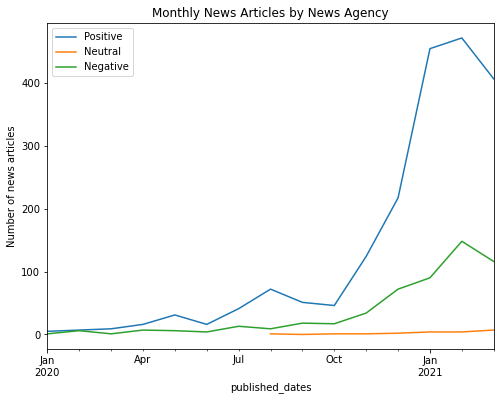

In [25]:
df['published_dates'] = pd.to_datetime(df['published_dates'])
#line chart of monthly streams
senti = df.set_index('published_dates')

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = senti[senti['analysis']=='Positive']['titles'].resample('M').count()
data2 = senti[senti['analysis']=='Neutral']['titles'].resample('M').count()
data3 = senti[senti['analysis']=='Negative']['titles'].resample('M').count()

data1.plot(ax=ax, label='Positive')
data2.plot(ax=ax, label='Neutral')
data3.plot(ax=ax, label='Negative')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('Number of news articles')
plt.title('Monthly News Articles by News Agency')

In [17]:
cnn = df[df['news_org']=='CNN']
gma = df[df['news_org']=='GMA News']
mnt = df[df['news_org']=='Manila Times']
pna = df[df['news_org']=='Philippines News Agency']
phs = df[df['news_org']=='Philstar']
rpr = df[df['news_org']=='Rappler']
abn = df[df['news_org']=='abscbn']
ssr = df[df['news_org']=='sunstar']
mnb = df[df['news_org']=='manilabulletin']


In [26]:
import plotly.express as px

fig = px.scatter(cnn,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [27]:
import plotly.express as px

fig = px.scatter(gma,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [28]:
import plotly.express as px

fig = px.scatter(mnt,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [29]:
import plotly.express as px

fig = px.scatter(pna,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [30]:
import plotly.express as px

fig = px.scatter(phs,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [31]:
import plotly.express as px

fig = px.scatter(rpr,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [32]:
import plotly.express as px

fig = px.scatter(abn,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [33]:
import plotly.express as px

fig = px.scatter(ssr,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [34]:
import plotly.express as px

fig = px.scatter(mnb,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()